#**import library**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go

from yellowbrick.target import FeatureCorrelation
from scipy.stats import norm
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
color = sns.color_palette()
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

#**Data Preparation**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/is/top_10000_1960-now.csv')
data.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992-08-03,https://i.scdn.co/image/ab67616d0000b27355346b...,...,0.0480,0.0158,0.112000,0.4080,0.504,111.458,4.0,NaN,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009-10-23,https://i.scdn.co/image/ab67616d0000b27326d73a...,...,0.1490,0.0142,0.000021,0.2370,0.800,127.045,4.0,NaN,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999-01-12,https://i.scdn.co/image/ab67616d0000b2738e4986...,...,0.0305,0.5600,0.000001,0.3380,0.706,74.981,4.0,NaN,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014-10-20,https://i.scdn.co/image/ab67616d0000b2731e7c53...,...,0.2590,0.5680,0.000051,0.0384,0.833,75.311,4.0,NaN,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969-12-05,https://i.scdn.co/image/ab67616d0000b27373d927...,...,0.0687,0.6750,0.000073,0.2890,0.497,85.818,4.0,NaN,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."


In [ ]:
# Columns with missing values and their counts
missing_values = data.isnull().sum()
print(missing_values)

Track URI                  0
Track Name                 1
Artist URI(s)              2
Artist Name(s)             1
Album URI                  2
Album Name                 1
Album Artist URI(s)        2
Album Artist Name(s)       2
Album Release Date         2
Album Image URL            4
Disc Number                0
Track Number               0
Track Duration (ms)        0
Track Preview URL       2897
Explicit                   0
Popularity                 0
ISRC                       3
Added By                   0
Added At                   0
Artist Genres            550
Danceability               2
Energy                     2
Key                        2
Loudness                   2
Mode                       2
Speechiness                2
Acousticness               2
Instrumentalness           2
Liveness                   2
Valence                    2
Tempo                      2
Time Signature             2
Album Genres            9999
Label                      6
Copyrights    

In [ ]:
# Finding duplicate rows
duplicate_rows = data[data.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 48


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Album Image URL,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Album Genres,Label,Copyrights
248,spotify:track:4DhbiXEuV7JxSR0wuqetTa,Free Ride,spotify:artist:7j9PMegEgVN1fNp8NZXNCI,The Edgar Winter Group,spotify:album:4CNEJF5wYGqhOYEKq8ciu8,They Only Come Out At Night,spotify:artist:3UNrI3SG1l2ezKikxQ2zuk,Edgar Winter,1972-11-30,https://i.scdn.co/image/ab67616d0000b27309a018...,...,0.0597,0.290000,0.003220,0.1890,0.814,124.204,4.0,NaN,Epic,P (P) 1972 SONY BMG MUSIC ENTERTAINMENT
1096,spotify:track:4vp2J1l5RD4gMZwGFLfRAu,I Gotta Feeling,spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,spotify:album:36fdxiOzdlmsrHgGcfvqUJ,THE E.N.D. (THE ENERGY NEVER DIES),spotify:artist:1yxSLGMDHlW21z4YXirZDS,Black Eyed Peas,2009-01-01,https://i.scdn.co/image/ab67616d0000b273f051a3...,...,0.0265,0.087300,0.000000,0.5090,0.610,127.960,4.0,NaN,Interscope,"C © 2009 Interscope, P ℗ 2009 Interscope"
1493,spotify:track:2dCmGcEOQrMQhMMS8Vj7Ca,Super Freak,spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,spotify:album:2DBFUBBqJQvfXpodPi2WP5,Street Songs (Deluxe Edition),spotify:artist:0FrpdcVlJQqibaz5HfBUrL,Rick James,1981-04-07,https://i.scdn.co/image/ab67616d0000b27317f9e7...,...,0.0531,0.220000,0.000000,0.0575,0.962,132.446,4.0,NaN,Motown,"C © 1981 Motown Records, a Division of UMG Rec..."
1582,spotify:track:7Dm3dV3WPNdTgxoNY7YFnc,The Chain - 2004 Remaster,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,spotify:album:1bt6q2SruMsBtcerNVtpZB,Rumours,spotify:artist:08GQAI4eElDnROBrJRGE0X,Fleetwood Mac,1977-02-04,https://i.scdn.co/image/ab67616d0000b27357df7c...,...,0.0524,0.051700,0.000066,0.0781,0.637,151.796,4.0,NaN,Rhino/Warner Records,"C © 2004 Warner Records Inc., P ℗ 2004 Warner ..."
2123,spotify:track:5eYwDBLucWfWI5KsV7oYX2,Mary Jane's Last Dance,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,spotify:album:7ait6chB3O3C1fMGUDJhtu,Anthology: Through The Years,spotify:artist:4tX2TplrkIP4v05BNC903e,Tom Petty and the Heartbreakers,2000-01-01,https://i.scdn.co/image/ab67616d0000b2736cfd76...,...,0.1400,0.038300,0.000001,0.2660,0.516,170.020,4.0,NaN,Interscope,"C © 2000 Universal Music Enterprises, a Divisi..."
2260,spotify:track:1LeWIs2hP2r5yOQnVuYoI5,Ain't No Mountain High Enough,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",spotify:album:67Eq3nfl1km9s5ig76Cc8B,United,"spotify:artist:3koiLjNrgRTNbOwViDipeA, spotify...","Marvin Gaye, Tammi Terrell",1967-08-29,https://i.scdn.co/image/ab67616d0000b27396e0b7...,...,0.0320,0.430000,0.000000,0.1840,0.800,129.991,4.0,NaN,Motown (Capitol),"C © 1967 Motown Records, a Division of UMG Rec..."
2524,spotify:track:0PGwM5vdr5fMejx0IIAYXj,I Want You Back,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,spotify:album:2oJRp9GV4zpFzpnneGZqZH,20th Century Masters: The Millennium Collectio...,spotify:artist:2iE18Oxc8YSumAU232n4rW,The Jackson 5,1999-01-01,https://i.scdn.co/image/ab67616d0000b273ea76a3...,...,0.0318,0.466000,0.001950,0.1870,0.960,98.293,4.0,NaN,Motown,"C © 1999 Motown Record Company L.P., P This Co..."
2623,spotify:track:39C5FuZ8C8M0QI8CrMsPkR,Foreplay / Long Time,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,spotify:album:2QLp07RO6anZHmtcKTEvSC,Boston,spotify:artist:29kkCKKGXheHuoO829FxWK,Boston,1976,https://i.scdn.co/image/ab67616d0000b27390ef97...,...,0.0545,0.009830,0.007480,0.0923,0.209,118.704,4.0,NaN,Epic/Legacy,"P (P) 1976, 2006 Epic Records, a division of S..."
2626,spotify:track:4aKIs5t9TqP59btlCGPrgw,Maneater,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,spotify:album:5nDQAU3K52JimAaShsZoSn,H2O,spotify:artist:77tT1kLj6mCWtFNqiOmP9H,Daryl Hall & John Oates,1982,https://i.scdn.co/image/ab67616d0000b273cb6fdb...,...,0.0398,0.035100,0.000044,0.0973,0.812,88.750,4.0,NaN,RCA/BMG Heritage,P This compilation (P) 2004 BMG Music
2691,spotify:track:6ztstiyZ

In [ ]:
# Remove duplicates and update the DataFrame
data.drop_duplicates(keep='first', inplace=True)

In [ ]:
data.dropna(subset=['Artist URI(s)'], inplace=True)  # Example to drop rows with missing values in 'column_name'
data.dropna(subset=['Artist Name(s)'], inplace=True)
data.dropna(subset=['Album URI'], inplace=True)
data.dropna(subset=['Album Name'], inplace=True)
data.dropna(subset=['Album Artist URI(s)'], inplace=True)
data.dropna(subset=['Album Artist Name(s)'], inplace=True)
data.dropna(subset=['Album Release Date'], inplace=True)

In [ ]:
data.drop(columns=['Album Image URL'], inplace=True)  # Example to drop column

In [ ]:
data.drop(columns=['Track Preview URL'], inplace=True)

In [ ]:
data['Artist Genres'].fillna('Unknown', inplace=True)  # Replace NaN with 'Unknown'

In [ ]:
data['Danceability'].fillna(data['Danceability'].mean(), inplace=True)  # Example to fill with mean

In [ ]:
data.drop(columns=['Album Genres'], inplace=True)  # Example to drop column

In [ ]:
data['Label'].fillna('Unknown', inplace=True)  # Replace NaN with 'Unknown'


In [ ]:
data['Copyrights'].fillna('Unknown', inplace=True)  # Replace NaN with 'Unknown'


In [ ]:
data['Album Release Date'].fillna(method='ffill', inplace=True)  # Example to fill with forward-fill

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Track URI               0
Track Name              0
Artist URI(s)           0
Artist Name(s)          0
Album URI               0
Album Name              0
Album Artist URI(s)     0
Album Artist Name(s)    0
Album Release Date      0
Disc Number             0
Track Number            0
Track Duration (ms)     0
Explicit                0
Popularity              0
ISRC                    0
Added By                0
Added At                0
Artist Genres           0
Danceability            0
Energy                  0
Key                     0
Loudness                0
Mode                    0
Speechiness             0
Acousticness            0
Instrumentalness        0
Liveness                0
Valence                 0
Tempo                   0
Time Signature          0
Label                   0
Copyrights              0
dtype: int64


###**แก้ไขรูปแบบคอลัมน์ album release date**

In [ ]:
print(data.dtypes)


Track URI                object
Track Name               object
Artist URI(s)            object
Artist Name(s)           object
Album URI                object
Album Name               object
Album Artist URI(s)      object
Album Artist Name(s)     object
Album Release Date       object
Disc Number               int64
Track Number              int64
Track Duration (ms)       int64
Explicit                   bool
Popularity                int64
ISRC                     object
Added By                 object
Added At                 object
Artist Genres            object
Danceability            float64
Energy                  float64
Key                     float64
Loudness                float64
Mode                    float64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Signature          float64
Label                    object
Copyrigh

In [ ]:
data['Album Release Date'] = data['Album Release Date'].apply(lambda x: str(x).split('-')[0] if pd.notnull(x) else np.nan)

In [ ]:
data

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Disc Number,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992,1,...,1.0,0.0480,0.015800,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic..."
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009,1,...,1.0,0.1490,0.014200,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son..."
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999,1,...,1.0,0.0305,0.560000,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014,1,...,1.0,0.2590,0.568000,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C..."
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969,1,...,1.0,0.0687,0.675000,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,spotify:track:3kcKlOkQQEPVwxwljbGJ5p,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",spotify:album:2NIChqkijGw4r4Dqfmg0A3,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",2022,1,...,0.0,0.0562,0.184000,0.000020,0.3090,0.400,125.975,4.0,Virgin,"C © 2022 Topic, under exclusive license to Uni..."
9995,spotify:track:5k9QrzJFDAp5cXVdzAi02f,Never Say Never - Radio Edit,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,spotify:album:2n506u3HKN3CaEDvAjv5Ct,Never Say Never,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,2005,1,...,1.0,0.0340,0.000354,0.011200,0.3380,0.767,130.978,4.0,Vicious,"C 2005 Vicious, a division of Vicious Recordin..."
9996,spotify:track:5ydeCNaWDmFbu4zl0roPAH,Groovejet (If This Ain't Love) [feat. Sophie E...,"spotify:artist:4bmymFwDu9zLCiTRUmrewb, spotify...","Spiller, Sophie Ellis-Bextor",spotify:album:20Q3pGpYiyicF32x5L8ppH,Groovejet (If This Ain't Love) [feat. Sophie E...,spotify:artist:4bmymFwDu9zLCiTRUmrewb,Spiller,2000,1,...,0.0,0.0389,0.000132,0.088900,0.3610,0.626,123.037,4.0,Defected Records,"C © 2021 Defected Records Limited, P ℗ 2021 De..."
9997,spotify:track:0zKbDrEXKpnExhGQRe9dxt,Lay Low,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,spotify:album:0EYKSXXTsON8ZA95BuCoXn,Lay Low,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,2023,1,...,0.0,0.1830,0.060700,0.000263,0.3460,0.420,122.060,4.0,Musical Freedom,"C © 2023 Musical Freedom Label Ltd., P ℗ 2023 ..."


In [ ]:
print(data['Key'].unique())  # To check unique values in 'Key' column

[ 8.  2.  7.  9.  0.  6. 11. 10.  4.  5.  3.  1.]


In [ ]:
keys={0:'C',1:'C#',2:'D',3:'D#',4:'E',5:'F',6:'F#',7:'G',8:'G#',9:'A',10:'A#',11:'B'}
data['keys'] = data['Key'].map(keys)
data['duration']= (data['Track Duration (ms)']/1000)/60
data.head()

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Disc Number,...,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,keys,duration
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992,1,...,0.0158,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",G#,3.604500
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009,1,...,0.0142,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",D,3.952000
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999,1,...,0.5600,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC,G,5.208883
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014,1,...,0.5680,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",A,3.890000
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969,1,...,0.6750,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",C,7.478667


In [ ]:
data['level_popularity'] = pd.cut(data['Popularity'], bins=[-float('Inf'), 20, 40, 60, 80, float('Inf')], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
data.head()


,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Disc Number,...,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,keys,duration,level_popularity
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992,1,...,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",G#,3.604500,Very Low
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009,1,...,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",D,3.952000,High
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999,1,...,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC,G,5.208883,Medium
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014,1,...,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",A,3.890000,Medium
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969,1,...,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",C,7.478667,Very Low


In [ ]:
data.to_csv('clean_data.csv', index=False)

#**Exploratory Data Analysis (EDA)**

In [ ]:
data.describe()

,Disc Number,Track Number,Track Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,duration
count,9948.000000,9948.000000,9.948000e+03,9948.00000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000,9948.000000
mean,1.035283,4.957680,2.248432e+05,37.56926,0.607806,0.683361,5.169883,-7.265180,0.698030,0.065149,0.208653,0.029354,0.185591,0.584984,121.490802,3.960294,3.747387
std,0.328073,5.506653,5.402142e+04,29.42816,0.145883,0.191166,3.579581,3.283102,0.459135,0.061377,0.249036,0.123743,0.148980,0.239049,26.267247,0.251529,0.900357
min,1.000000,1.000000,9.122600e+04,0.00000,0.000000,0.000020,0.000000,-29.368000,0.000000,0.000000,0.000003,0.000000,0.012000,0.000000,0.000000,0.000000,1.520433
25%,1.000000,1.000000,1.926660e+05,0.00000,0.515000,0.560000,2.000000,-9.059500,0.000000,0.033100,0.018300,0.000000,0.089200,0.398000,102.577000,4.000000,3.211100
50%,1.000000,3.000000,2.199395e+05,42.00000,0.617000,0.712000,5.000000,-6.515500,1.000000,0.042900,0.095650,0.000006,0.127000,0.596000,120.627000,4.000000,3.665658
75%,1.000000,7.000000,2.502100e+05,64.00000,0.710000,0.836000,8.000000,-4.881000,1.000000,0.067600,0.318000,0.000557,0.245000,0.782000,134.324250,4.000000,4.170167
max,15.000000,93.000000,1.561133e+06,98.00000,0.988000,0.997000,11.000000,2.769000,1.000000,0.711000,0.991000,0.985000,0.989000,0.995000,217.913000,5.000000,26.018883


In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'spotify:track:1XAZlnVtthcDZt2NI1Dtxo'

<Figure size 1200x1000 with 0 Axes>

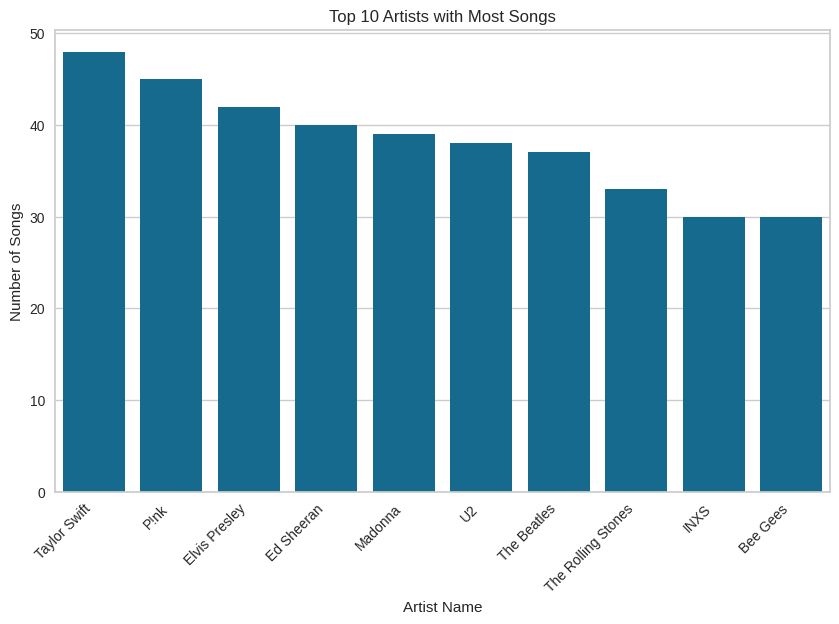

In [ ]:
# Top 10 artists with the most number of songs
top_artists = data['Artist Name(s)'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.index, y=top_artists.values)
plt.title('Top 10 Artists with Most Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

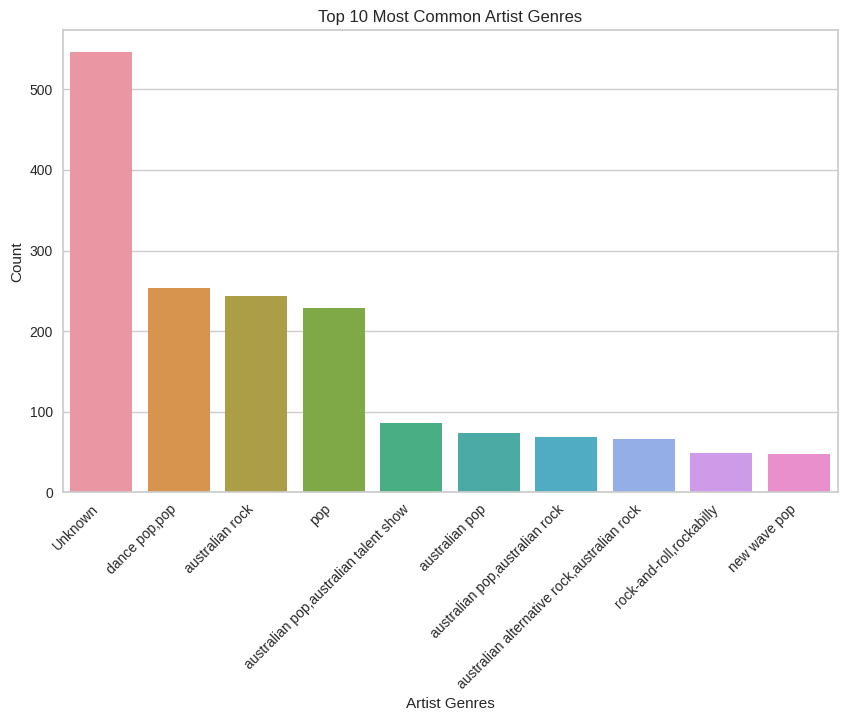

In [ ]:
# Top 10 most common artist genres
top_artist_genres = data['Artist Genres'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artist_genres.index, y=top_artist_genres.values)
plt.title('Top 10 Most Common Artist Genres')
plt.xlabel('Artist Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

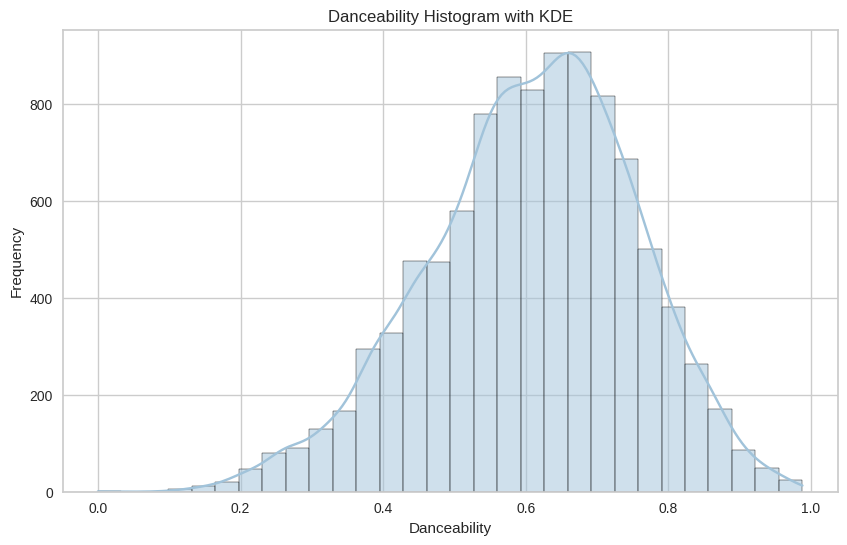

Skewness of Danceability:  -0.3140158194352918


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Danceability'], kde=True, color='#a1c3da', bins=30)
plt.title('Danceability Histogram with KDE')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.show()

danceability_skewness = data['Danceability'].skew()
print("Skewness of Danceability: ", danceability_skewness)


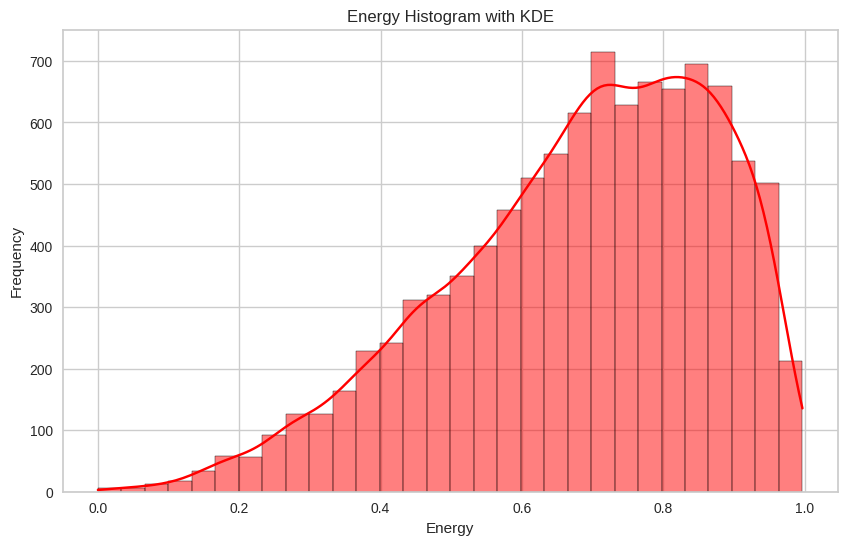

Skewness of Energy:  -0.6387986614437129


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Energy'], kde=True, color='red', bins=30)
plt.title('Energy Histogram with KDE')
plt.xlabel('Energy')
plt.ylabel('Frequency')
plt.show()

energy_skewness = data['Energy'].skew()
print("Skewness of Energy: ", energy_skewness)

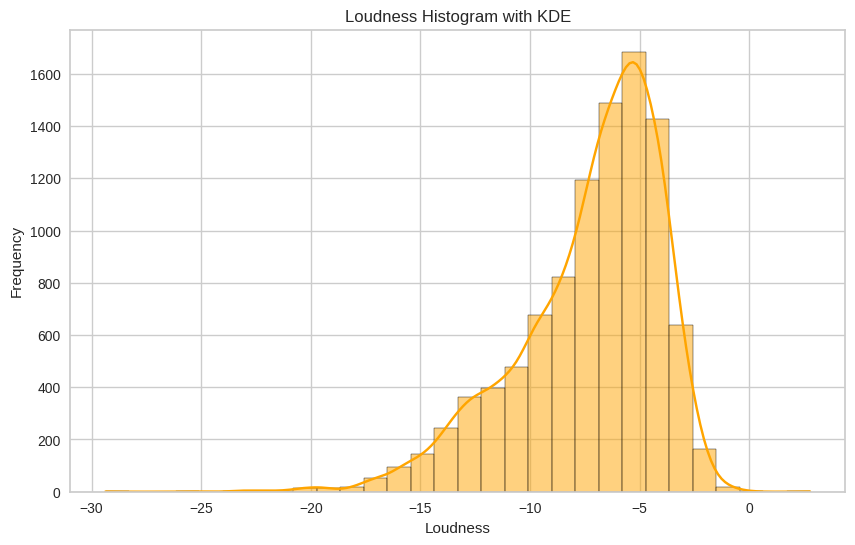

Skewness of Loudness:  -1.0418954085797743


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Loudness'], kde=True, color='orange', bins=30)
plt.title('Loudness Histogram with KDE')
plt.xlabel('Loudness')
plt.ylabel('Frequency')
plt.show()

loudness_skewness = data['Loudness'].skew()
print("Skewness of Loudness: ", loudness_skewness)

In [ ]:
pip install squarify


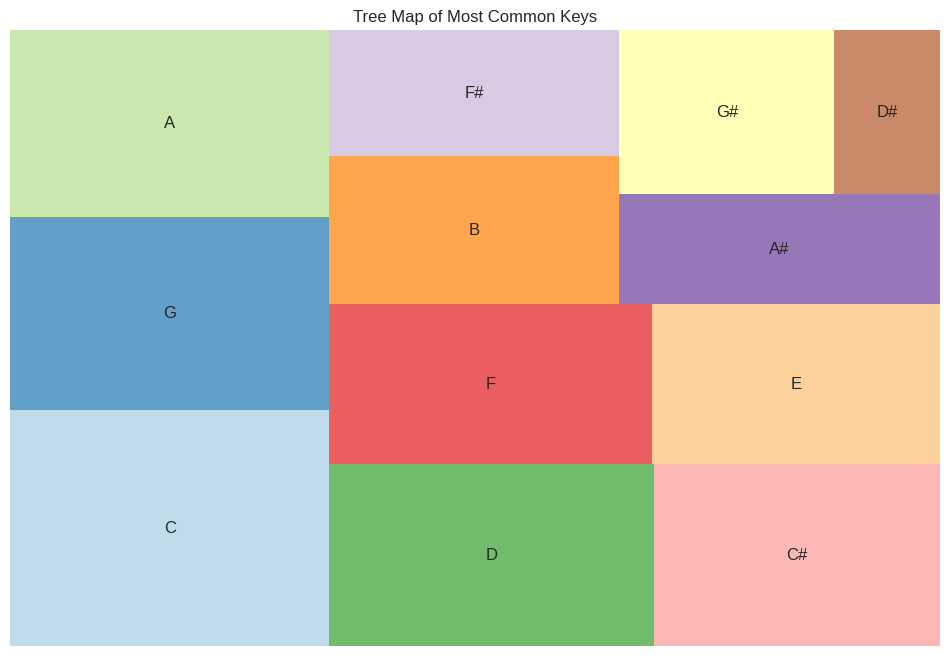

In [ ]:
import squarify

# Suppose you have a DataFrame 'data' and a column 'keys' representing the keys of songs.

# Calculate frequency of each unique key
key_counts = data['keys'].value_counts()

# Prepare data
labels = key_counts.index
sizes = key_counts.values

# Choose colors
colors = plt.cm.Paired(range(len(labels)))

# Draw Tree Map
plt.figure(figsize=(12,8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7)
plt.title('Tree Map of Most Common Keys')
plt.axis('off')
plt.show()

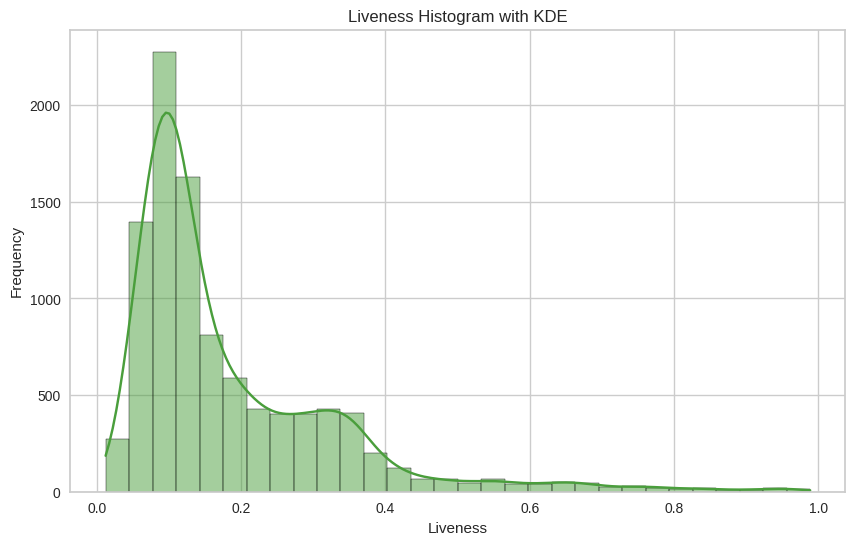

Skewness of Liveness:  2.0832393217665794


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Liveness'], kde=True, color='#4A9E3C', bins=30)
plt.title('Liveness Histogram with KDE')
plt.xlabel('Liveness')
plt.ylabel('Frequency')
plt.show()

liveness_skewness = data['Liveness'].skew()
print("Skewness of Liveness: ", liveness_skewness)

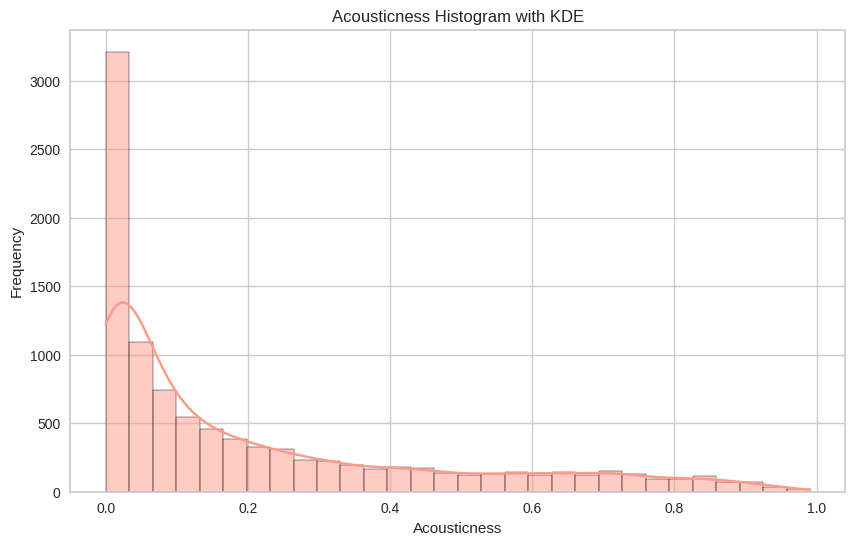

Skewness of Acousticness:  1.2967426336894456


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Acousticness'], kde=True, color='#ff9a8a', bins=30)
plt.title('Acousticness Histogram with KDE')
plt.xlabel('Acousticness')
plt.ylabel('Frequency')
plt.show()

acousticness_skewness = data['Acousticness'].skew()
print("Skewness of Acousticness: ", acousticness_skewness)

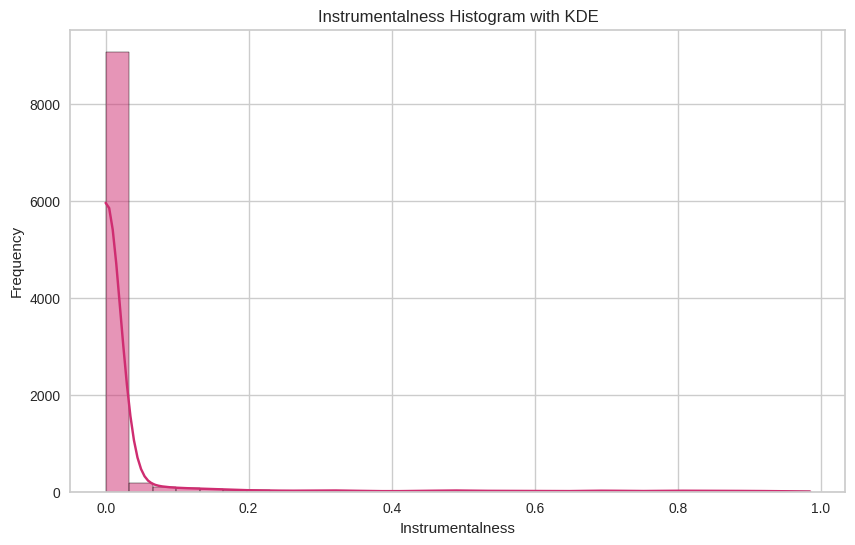

Skewness of Instrumentalness:  5.239307659354943


In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['Instrumentalness'], kde=True, color='#cf2d71', bins=30)
plt.title('Instrumentalness Histogram with KDE')
plt.xlabel('Instrumentalness')
plt.ylabel('Frequency')
plt.show()

instrumentalness_skewness = data['Instrumentalness'].skew()
print("Skewness of Instrumentalness: ", instrumentalness_skewness)

The mean of Tempo is: 121.49080237233616


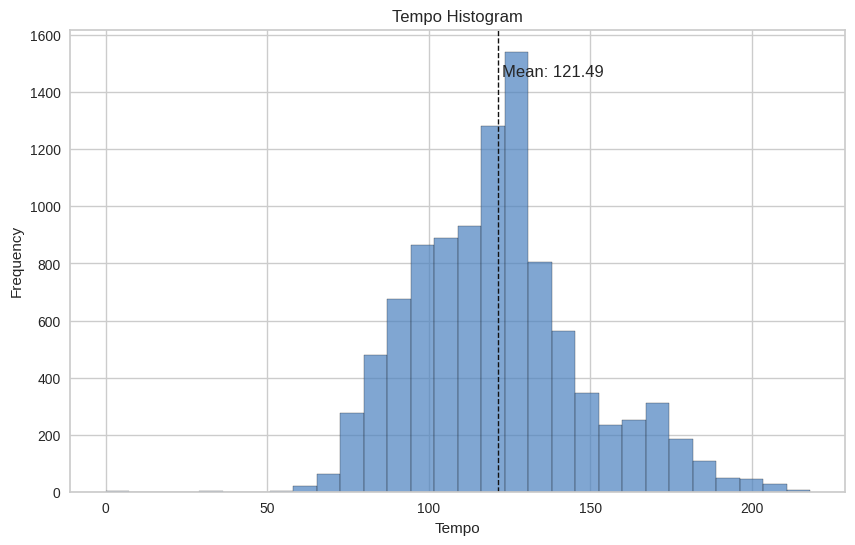

In [ ]:
# Calculate the mean of Tempo
tempo_mean = data['Tempo'].mean()
print(f"The mean of Tempo is: {tempo_mean}")

# Tempo Histogram
plt.figure(figsize=(10,6))
plt.hist(data['Tempo'], bins=30, color='#4b81bf', edgecolor='k', alpha=0.7)
plt.title('Tempo Histogram')
plt.axvline(tempo_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(tempo_mean*1.01, max_ylim*0.9, 'Mean: {:.2f}'.format(tempo_mean))
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.show()


##**ภาพรวมของ Audio characteristics ในแต่ละปี**

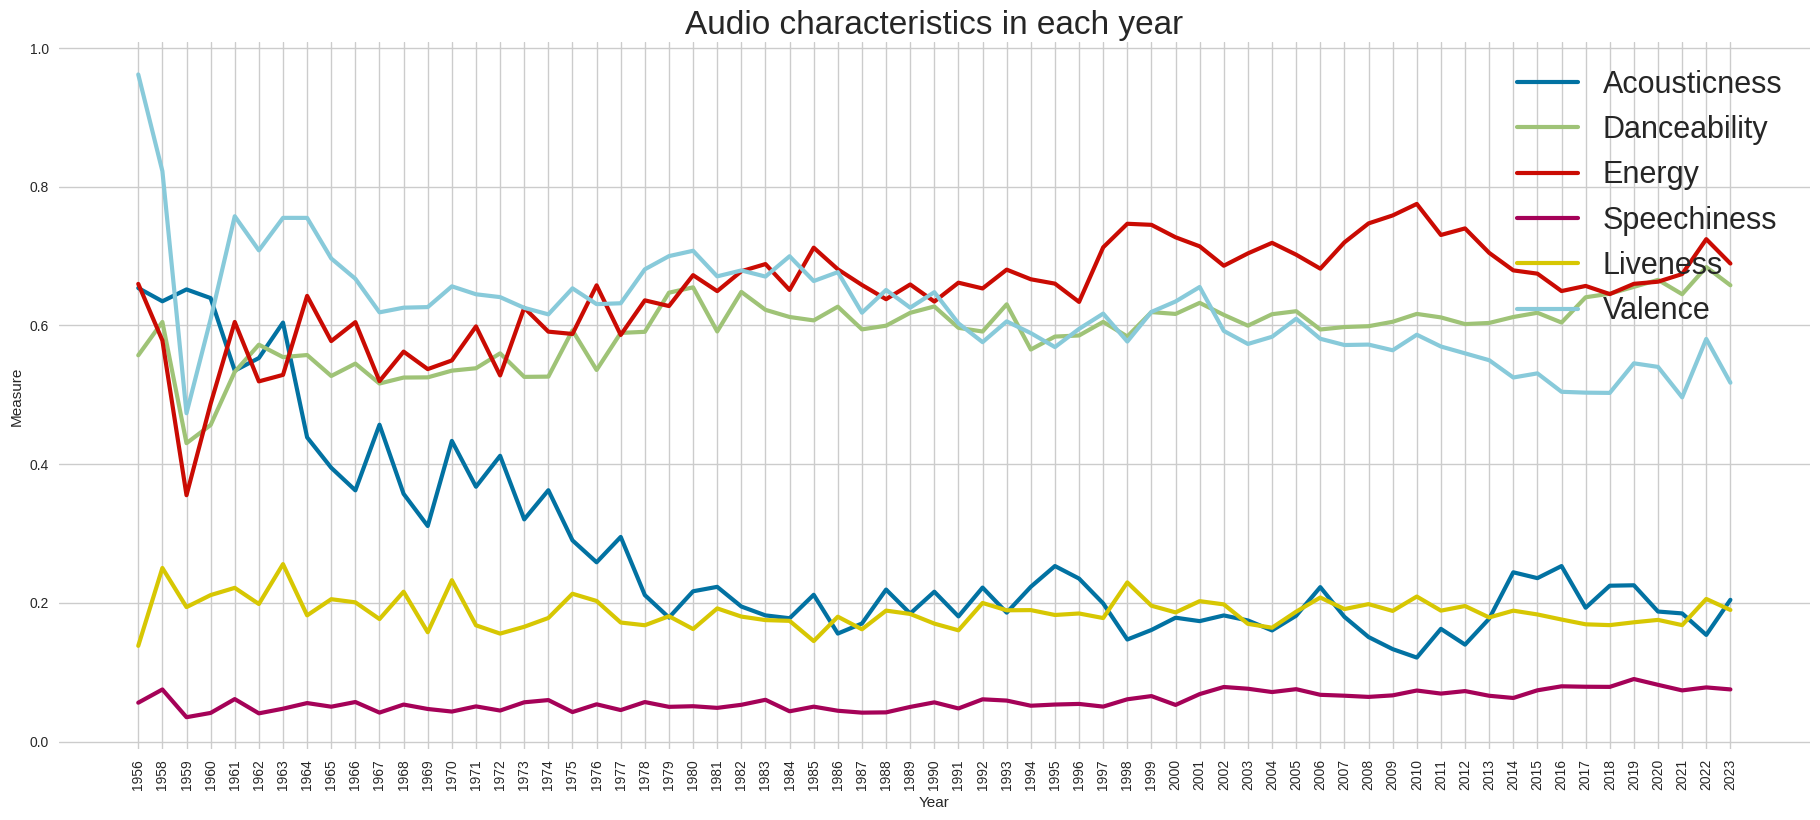

In [ ]:
fig,ax = plt.subplots(figsize=(20, 10))
sns.despine(fig, left=True, bottom=True)
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 3})

columns = ["Acousticness","Danceability","Energy","Speechiness","Liveness","Valence"]
for col in columns:
    x = data.groupby("Album Release Date")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics in each year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

# ปรับค่า xticks และหมุนชื่อปี
plt.xticks(rotation=90)  # หมุนชื่อปี 45 องศา
plt.tight_layout(pad=3)

plt.show()

In [ ]:
data

,Track URI,Track Name,Artist URI(s),Artist Name(s),Album URI,Album Name,Album Artist URI(s),Album Artist Name(s),Album Release Date,Disc Number,...,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Label,Copyrights,keys,duration,level_popularity
0,spotify:track:1XAZlnVtthcDZt2NI1Dtxo,Justified & Ancient - Stand by the Jams,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,spotify:album:4MC0ZjNtVP1nDD5lsLxFjc,Songs Collection,spotify:artist:6dYrdRlNZSKaVxYg5IrvCH,The KLF,1992,1,...,0.112000,0.4080,0.504,111.458,4.0,Jams Communications,"C 1992 Copyright Control, P 1992 Jams Communic...",G#,3.604500,Very Low
1,spotify:track:6a8GbQIlV8HBUW3c6Uk9PH,I Know You Want Me (Calle Ocho),spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,spotify:album:5xLAcbvbSAlRtPXnKkggXA,Pitbull Starring In Rebelution,spotify:artist:0TnOYISbd1XYRBk9myaseg,Pitbull,2009,1,...,0.000021,0.2370,0.800,127.045,4.0,Mr.305/Polo Grounds Music/J Records,"P (P) 2009 RCA/JIVE Label Group, a unit of Son...",D,3.952000,High
2,spotify:track:70XtWbcVZcpaOddJftMcVi,From the Bottom of My Broken Heart,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,spotify:album:3WNxdumkSMGMJRhEgK80qx,...Baby One More Time (Digital Deluxe Version),spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,1999,1,...,0.000001,0.3380,0.706,74.981,4.0,Jive,P (P) 1999 Zomba Recording LLC,G,5.208883,Medium
3,spotify:track:1NXUWyPJk5kO6DQJ5t7bDu,Apeman - 2014 Remastered Version,spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,spotify:album:6lL6HugNEN4Vlc8sj0Zcse,"Lola vs. Powerman and the Moneygoround, Pt. On...",spotify:artist:1SQRv42e4PjEYfPhS0Tk9E,The Kinks,2014,1,...,0.000051,0.0384,0.833,75.311,4.0,Sanctuary Records,"C © 2014 Sanctuary Records Group Ltd., a BMG C...",A,3.890000,Medium
4,spotify:track:72WZtWs6V7uu3aMgMmEkYe,You Can't Always Get What You Want,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,spotify:album:0c78nsgqX6VfniSNWIxwoD,Let It Bleed,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,The Rolling Stones,1969,1,...,0.000073,0.2890,0.497,85.818,4.0,Universal Music Group,"C © 2002 ABKCO Music & Records Inc., P ℗ 2002 ...",C,7.478667,Very Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,spotify:track:3kcKlOkQQEPVwxwljbGJ5p,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",spotify:album:2NIChqkijGw4r4Dqfmg0A3,Kernkraft 400 (A Better Day),"spotify:artist:0u6GtibW46tFX7koQ6uNJZ, spotify...","Topic, A7S",2022,1,...,0.000020,0.3090,0.400,125.975,4.0,Virgin,"C © 2022 Topic, under exclusive license to Uni...",B,2.763333,High
9995,spotify:track:5k9QrzJFDAp5cXVdzAi02f,Never Say Never - Radio Edit,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,spotify:album:2n506u3HKN3CaEDvAjv5Ct,Never Say Never,spotify:artist:1ScZSjoYAihNNm9qlhzDnL,Vandalism,2005,1,...,0.011200,0.3380,0.767,130.978,4.0,Vicious,"C 2005 Vicious, a division of Vicious Recordin...",A,2.944000,Very Low
9996,spotify:track:5ydeCNaWDmFbu4zl0roPAH,Groovejet (If This Ain't Love) [feat. Sophie E...,"spotify:artist:4bmymFwDu9zLCiTRUmrewb, spotify...","Spiller, Sophie Ellis-Bextor",spotify:album:20Q3pGpYiyicF32x5L8ppH,Groovejet (If This Ain't Love) [feat. Sophie E...,spotify:artist:4bmymFwDu9zLCiTRUmrewb,Spiller,2000,1,...,0.088900,0.3610,0.626,123.037,4.0,Defected Records,"C © 2021 Defected Records Limited, P ℗ 2021 De...",A,3.793650,High
9997,spotify:track:0zKbDrEXKpnExhGQRe9dxt,Lay Low,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,spotify:album:0EYKSXXTsON8ZA95BuCoXn,Lay Low,spotify:artist:2o5jDhtHVPhrJdv3cEQ99Z,Tiësto,2023,1,...,0.000263,0.3460,0.420,122.060,4.0,Musical Freedom,"C © 2023 Musical Freedom Label Ltd., P ℗ 2023 ...",C#,2.557367,Very High


##**Modeling**

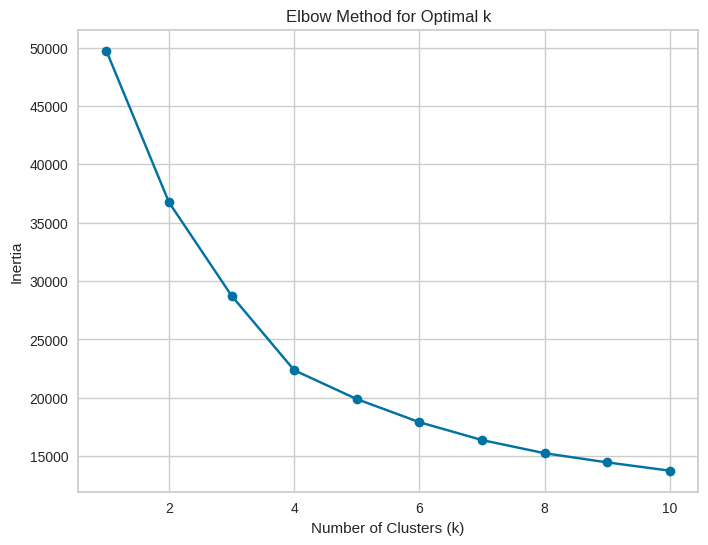

Cluster
1    3879
3    3075
2    1500
0    1180
4     314
Name: count, dtype: int64


In [ ]:
from sklearn.cluster import KMeans

# Selecting relevant features for clustering
features_for_clustering = data[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters
# Let's say k=5
k = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the 'Cluster' column to the DataFrame
data['Cluster'] = clusters

# Print the number of songs in each cluster
print(data['Cluster'].value_counts())

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Selecting relevant features for prediction
features_for_prediction = data[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness', 'Loudness', 'Speechiness','Tempo', 'Liveness', 'duration']]

# Target variable: Popularity
target = data['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_for_prediction, target, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r_squared}")

# Optional: Print the coefficients of the model
print("Model Coefficients:")
for feature, coefficient in zip(features_for_prediction.columns, model.coef_):
    print(f"{feature}: {coefficient}")

Mean Squared Error (MSE): 881.596910299481
R-squared (R2): -0.0027586520896609734
Model Coefficients:
Danceability: 14.09345009433708
Energy: -5.083631899360649
Valence: -3.1839961149969005
Acousticness: -2.1252336798445612
Instrumentalness: -12.299922379695715
Loudness: 0.3775032180337032
Speechiness: 1.5970175795462385
Tempo: 0.00042592025161791724
Liveness: -2.837656494729979
duration: 0.6081381843602163


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_rf = rf_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r_squared_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest - R-squared (R2): {r_squared_rf}")

Random Forest - Mean Squared Error (MSE): 935.1508156435234
Random Forest - R-squared (R2): -0.06367270624473576


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming y_train and y_test are your binary/multiclass labels

# Create and train the Support Vector Machine model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict labels on the test set
y_pred_svm = svm_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred_svm)
report = classification_report(y_test, y_pred_svm)

print(f"SVM - Accuracy: {accuracy}")
print("Classification Report:")
print(report)


SVM - Accuracy: 0.28241206030150756
Classification Report:
              precision    recall  f1-score   support

           0       0.28      1.00      0.44       562
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         7
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         4
          16       0.0

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model with k neighbors. Let's start with k=5 as an example.
knn_model = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Use the fitted model to predict on the test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r_squared_knn = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f"KNN - Mean Squared Error (MSE): {mse_knn}")
print(f"KNN - R-squared (R2): {r_squared_knn}")


KNN - Mean Squared Error (MSE): 1029.716040201005
KNN - R-squared (R2): -0.17123444563377643


Decision Tree - Mean Squared Error (MSE): 1830.8229899497487
Decision Tree - R-squared (R2): -1.0824410477948718


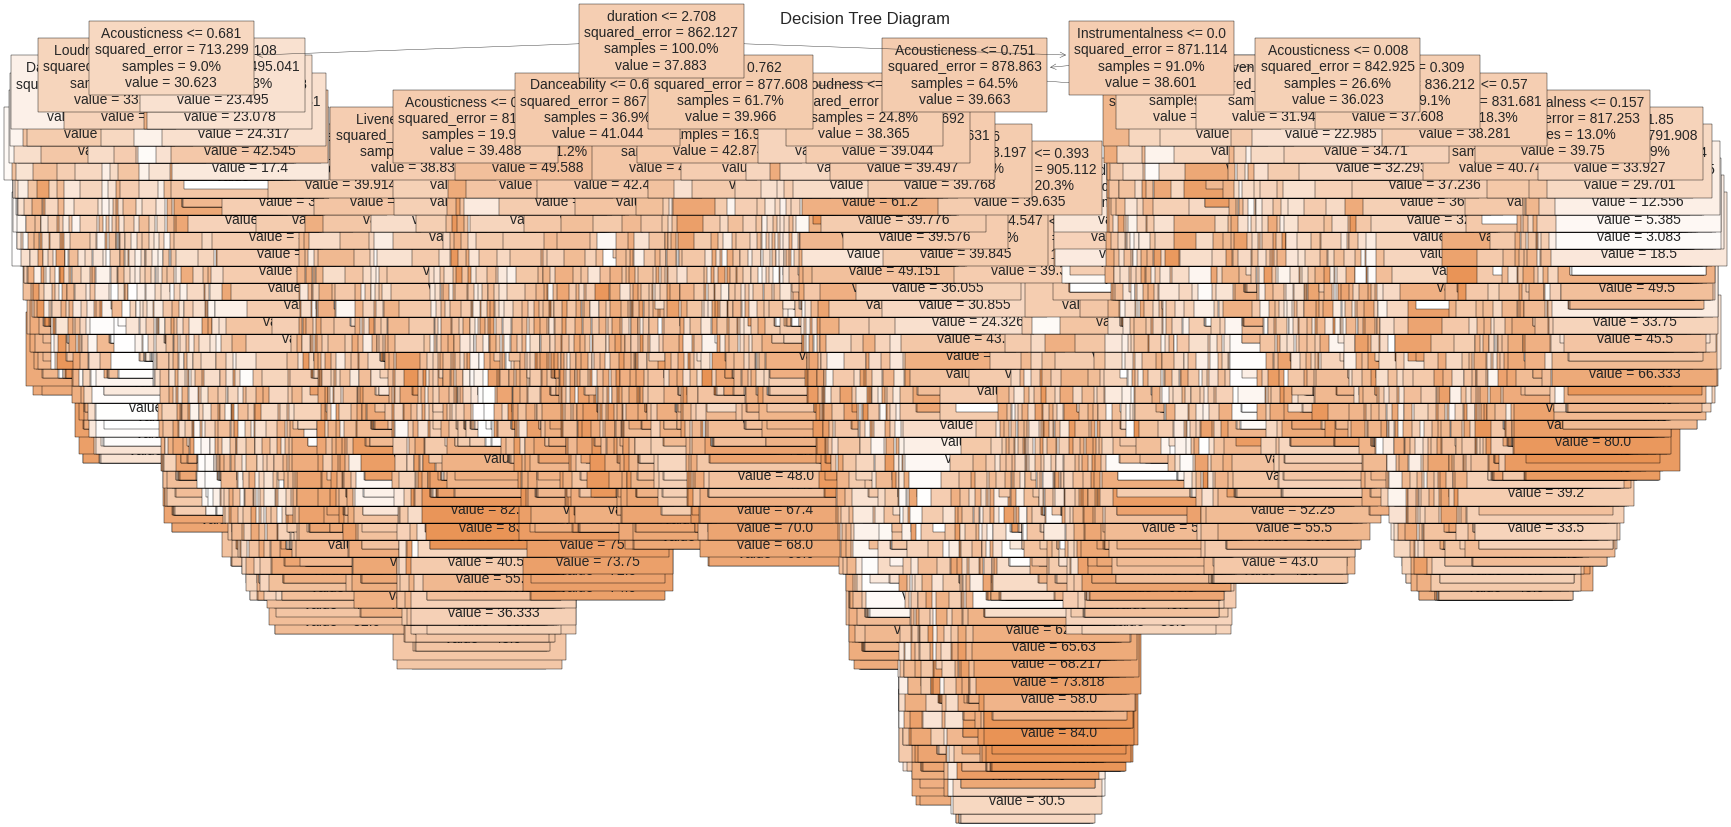

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_dt = dt_model.predict(X_test)

# Model evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r_squared_dt = r2_score(y_test, y_pred_dt)

# Print the evaluation metrics
print(f"Decision Tree - Mean Squared Error (MSE): {mse_dt}")
print(f"Decision Tree - R-squared (R2): {r_squared_dt}")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Create the decision tree plot
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, proportion=True, fontsize=10)
plt.title("Decision Tree Diagram")
plt.show()






In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have a DataFrame `df` with features and target variable.

# Define features (X) and the target (y)
X = data[['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness', 'Loudness', 'Speechiness','Tempo', 'Liveness', 'duration']]
y = data['Popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict popularity on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r_squared_xgb = r2_score(y_test, y_pred_xgb)

# Print model evaluation results
print(f"XGBoost - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost - R-squared (R2): {r_squared_xgb}")


XGBoost - Mean Squared Error (MSE): 999.8004502963161
XGBoost - R-squared (R2): -0.13720742460088453


In [ ]:
pip install xgboost scikit-learn